<a href="https://colab.research.google.com/github/kalyan6305/FMML-22B21A4531/blob/main/FMML_Module4_Lab1_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

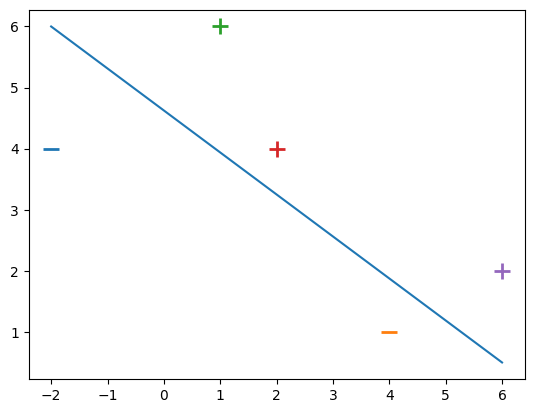

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

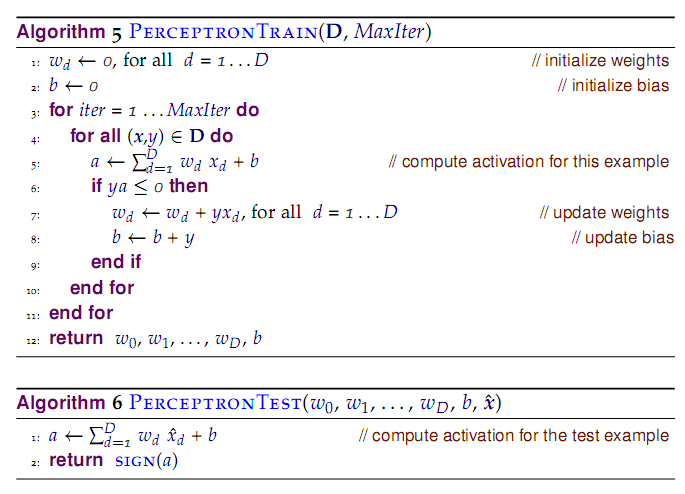

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

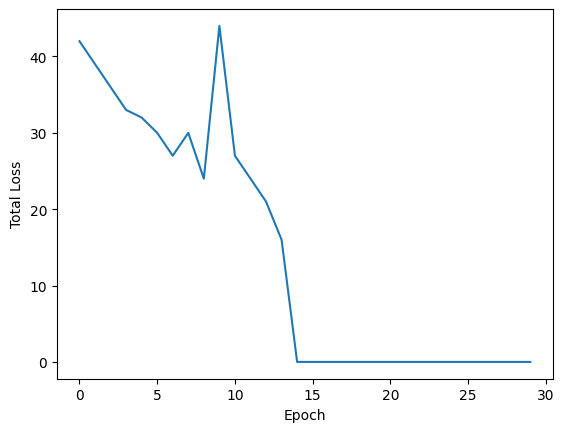

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

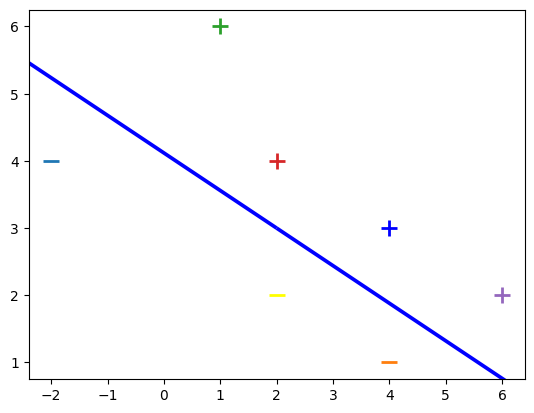

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



**ANSWER 1**

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


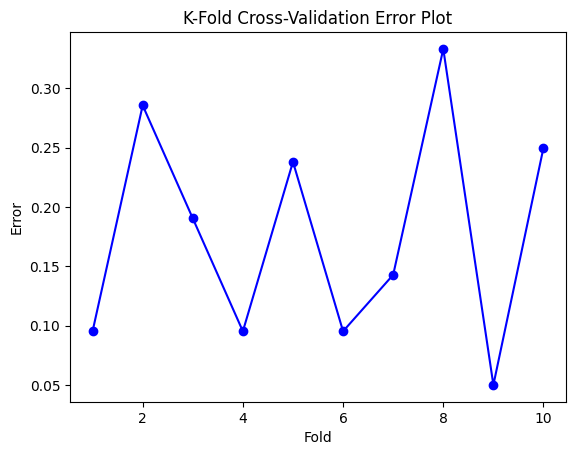

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml

# Load the Sonar dataset (you can replace this with the Banknote dataset)
sonar = fetch_openml(name='sonar', version=1)

# Separate features and labels
X = sonar.data
y = sonar.target

# Create a Random Forest classifier (you can use any classifier of your choice)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the number of folds for cross-validation
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform K-Fold cross-validation
cv_results = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Plot the error for each fold
plt.plot(range(1, k_folds + 1), 1 - cv_results, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Error')
plt.title('K-Fold Cross-Validation Error Plot')
plt.show()


In [14]:
pip install scikit-learn matplotlib

**ANSWER 2**

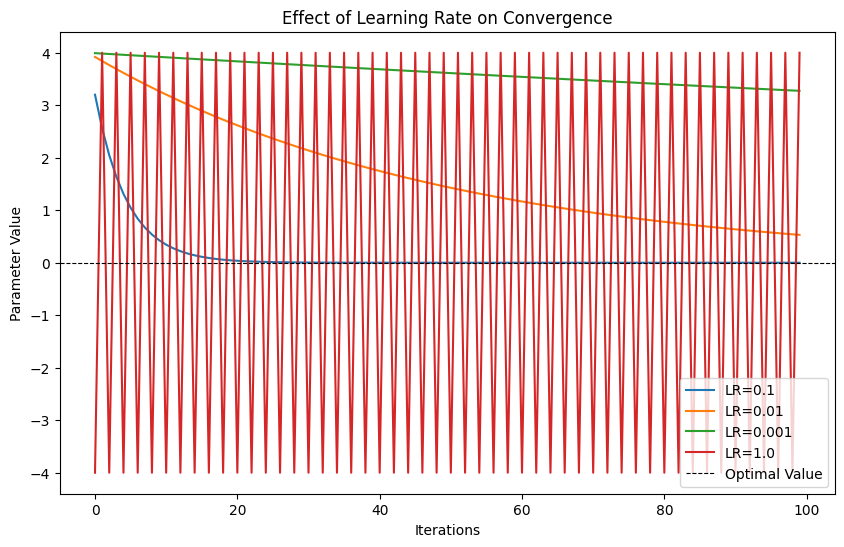

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x, learning_rate, iterations):
    history = []
    for _ in range(iterations):
        gradient = 2 * x  # Gradient of a simple quadratic function
        x = x - learning_rate * gradient
        history.append(x)
    return history

# Set initial value and parameters
initial_value = 4.0
learning_rates = [0.1, 0.01, 0.001, 1.0]  # Try different learning rates
iterations = 100

# Plot convergence for different learning rates
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    history = gradient_descent(initial_value, lr, iterations)
    plt.plot(history, label=f'LR={lr}')

plt.axhline(0, color='black', linestyle='--', linewidth=0.8, label='Optimal Value')
plt.xlabel('Iterations')
plt.ylabel('Parameter Value')
plt.title('Effect of Learning Rate on Convergence')
plt.legend()
plt.show()

**ANSWER 3**

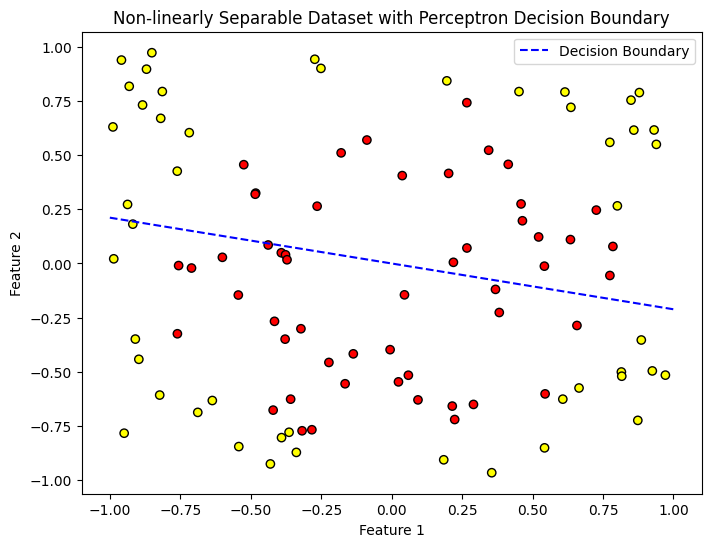

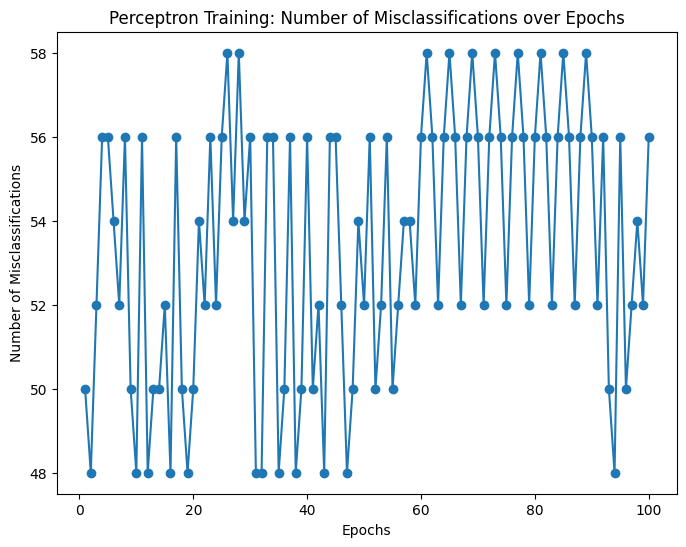

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Create a non-linearly separable toy dataset
np.random.seed(42)
X = np.random.rand(100, 2) * 2 - 1  # Random points in the [-1, 1] range
y = np.where(X[:, 0]**2 + X[:, 1]**2 > 0.7, 1, -1)  # Circle as decision boundary

# Implement the perceptron algorithm
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)
        self.errors = []

        for _ in range(self.epochs):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                error += int(update != 0.0)
            self.errors.append(error)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Apply the perceptron algorithm
perceptron = Perceptron(learning_rate=0.1, epochs=100)
perceptron.fit(X, y)

# Plot the decision boundary and errors
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', marker='o', edgecolors='k')
plt.title('Non-linearly Separable Dataset with Perceptron Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary
x_decision_boundary = np.linspace(-1, 1, 100)
y_decision_boundary = -(perceptron.weights[0] + perceptron.weights[1] * x_decision_boundary) / perceptron.weights[2]
plt.plot(x_decision_boundary, y_decision_boundary, '--', color='blue', label='Decision Boundary')

plt.legend()
plt.show()

# Plot the number of misclassifications during training
plt.figure(figsize=(8, 6))
plt.plot(range(1, perceptron.epochs + 1), perceptron.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron Training: Number of Misclassifications over Epochs')
plt.show()

In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


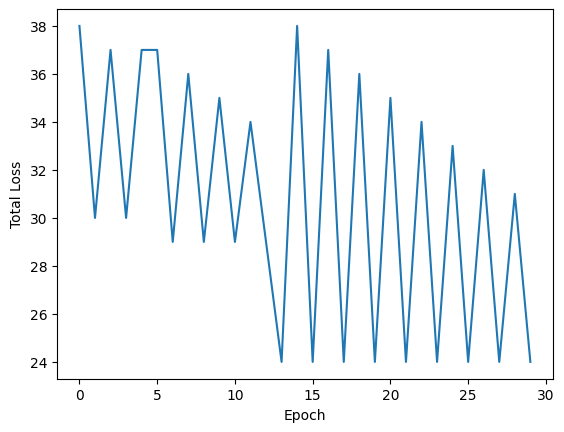

In [12]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.